In [39]:
from verispy import VERIS
import pandas as pd
import matplotlib.pyplot as plt
data_dir="validated"
v = VERIS(json_dir=data_dir)
print (v.schema_url)

Found 8543 json files.
https://raw.githubusercontent.com/vz-risk/veris/master/verisc-merged.json


In [40]:
veris_df = v.json_to_df(verbose=True)

Loading schema
Loading JSON files to DataFrame.


100%|██████████| 8543/8543 [00:01<00:00, 7243.63it/s]


Finished loading JSON files to dataframe.
Dropped 5 rows with duplicated incident_id values.
Building DataFrame with enumerations.
Building enumeration columns.


  5%|▌         | 9/173 [00:00<00:02, 79.65it/s]c:\users\raheel\appdata\local\programs\python\python37\lib\site-packages\verispy\veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
c:\users\raheel\appdata\local\programs\python\python37\lib\site-packages\verispy\veris.py:190: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: enum_checker(x, item))
c:\users\raheel\appdata\local\pro

Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


# Start of Data Analysis

### Get number of incidents where victim company has over 1000 employees

In [41]:
large_filter = veris_df["victim.employee_count.Large"] == True
large_df = veris_df[large_filter]
print(len(large_df))

269


### Plot graph of number of incidents per year over the 2 decades for large companies

<AxesSubplot:title={'center':'Number of incidents over two decades for large companies'}, xlabel='Year', ylabel='Number of incidents'>

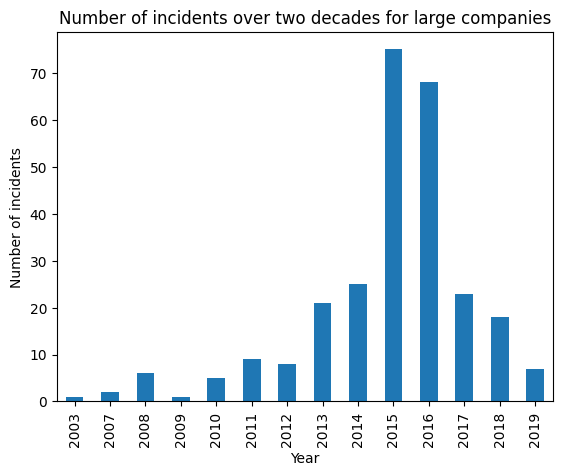

In [42]:
large_df_sortedtime = large_df.sort_values('timeline.incident.year', ascending=False)
sorted_incident_num = large_df_sortedtime['timeline.incident.year'].value_counts().sort_index()
sorted_incident_num.plot(kind="bar", title="Number of incidents over two decades for large companies",
                         xlabel="Year", ylabel="Number of incidents")

### Effect of action type on variety of assets compromised

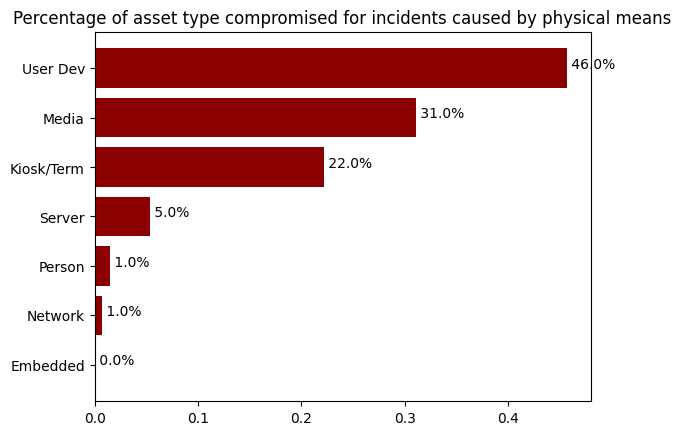

In [43]:
filter = veris_df['action.Physical']
summary = v.enum_summary(veris_df[filter], 'asset.variety')
fig = v.plot_barchart(summary, "Percentage of asset type compromised for incidents caused by physical means")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

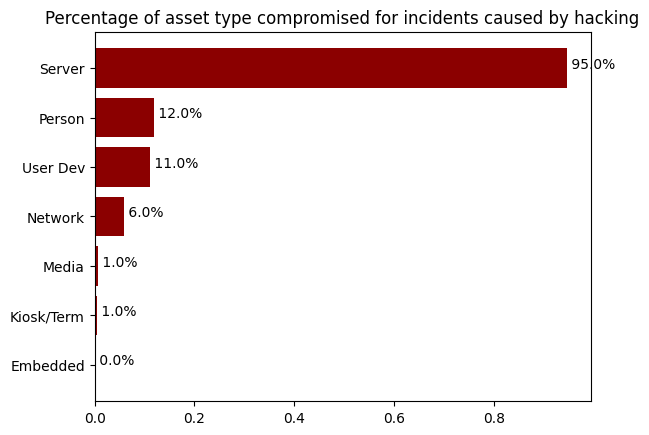

In [44]:
filter = veris_df['action.Hacking']
summary = v.enum_summary(veris_df[filter], 'asset.variety')
fig = v.plot_barchart(summary, "Percentage of asset type compromised for incidents caused by hacking")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

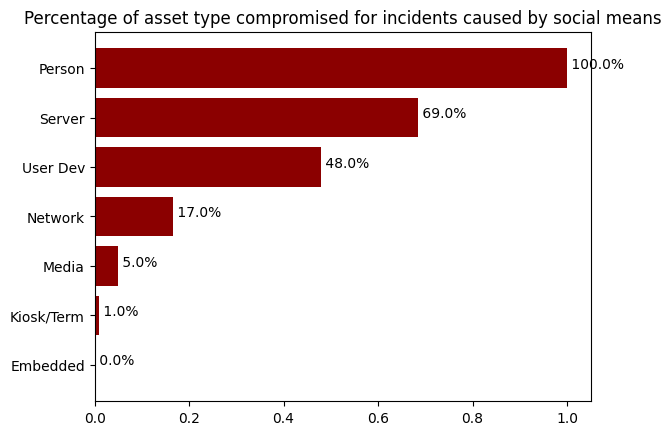

In [45]:
filter = veris_df['action.Social']
summary = v.enum_summary(veris_df[filter], 'asset.variety')
fig = v.plot_barchart(summary, "Percentage of asset type compromised for incidents caused by social means")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

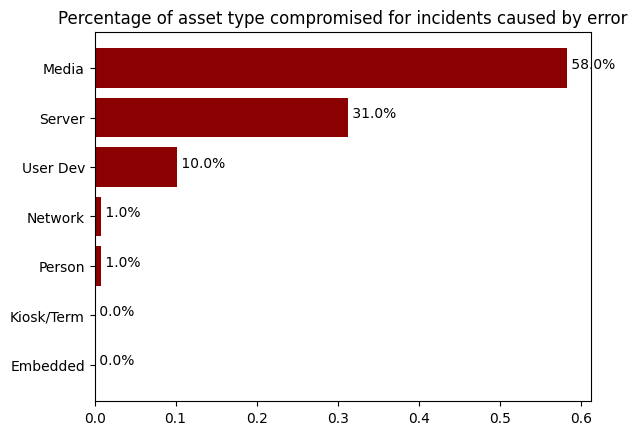

In [46]:
filter = veris_df['action.Error']
summary = v.enum_summary(veris_df[filter], 'asset.variety')
fig = v.plot_barchart(summary, "Percentage of asset type compromised for incidents caused by error")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

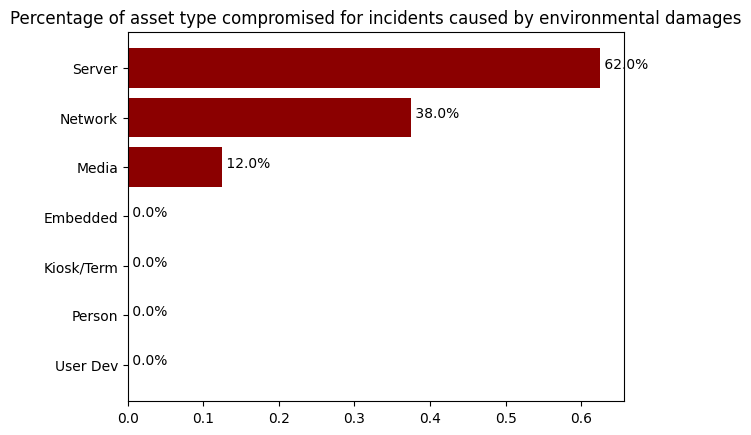

In [47]:
filter = veris_df['action.Environmental']
summary = v.enum_summary(veris_df[filter], 'asset.variety')
fig = v.plot_barchart(summary, "Percentage of asset type compromised for incidents caused by environmental damages")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas finibus eleifend bibendum. Phasellus nec quam eget diam porttitor egestas vel rutrum nibh

<AxesSubplot:title={'center':'Number of incidents over two decades for large companies'}, xlabel='Asset type', ylabel='Number of incidents'>

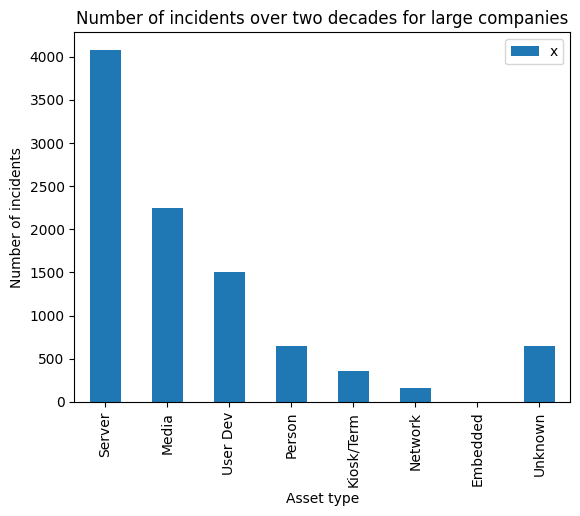

In [48]:
action_nums = v.enum_summary(veris_df, 'asset.variety')
new_action = action_nums[['enum','x']]
new_action.set_index('enum', inplace=True)
new_action.plot(kind="bar", title="Number of incidents over two decades for large companies",
                        xlabel="Asset type", ylabel="Number of incidents")

